## Levy SDE Simulation

In [3]:
%load_ext autoreload
%autoreload 2
import numpy as np
import argparse
import yaml
import os
import matplotlib.pyplot as plt
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Let's simulate this Levy SDE

\begin{align*}
    dz_t &= \mu_t dt + \sigma_tdW_t + \int \gamma(t,z_{t_-}, x) \tilde{\mu}(dt,dx).
\end{align*}

In particular, we pick the compensated Poisson measure of the form
\begin{align*}
\tilde{\mu}(dt,dx) = \mu(dt,dx) - \nu(dt, dx) = \mu(dt)p(x) dx - \lambda(t)p(x) dt  dx,
\end{align*}

For simplicity, assume $p(x)$ is the point measure and $\lambda(t)=\lambda\in\mathbb{R}_+$. Let $\mu_t=\mu(t,z_t)=-z_t/2$, $\sigma_t=1$ and $\gamma(t,z_{t_-}, x)=\gamma(t,z_{t_-})=2$:
\begin{align*}
    dz_t &= -0.5z_t dt + dW_t + 2\tilde{\mu}(dt) \\
    &= -0.5z_t dt + dW_t + 2(\mu(dt) - \lambda dt) \\
    &=-(0.5z_t +\lambda)dt + dW_t + 2\mu(dt).
\end{align*}

With a step size dt, use the Euler-Maruyama scheme: $z_{t+1} = z_t + \text{dt}*(-0.5z_t + \lambda) + \sqrt{dt}\epsilon$, where $\epsilon\sim \mathcal{N}(0,1)$.

In [235]:
# SDE configurations
scale = 0.1
t_terminal = 1.
dt_euler = 1e-2
jump_value = 0.3
diffusion = 1
# initial conditions
t = 0.
tau = 0.  # cumulative times
z = 0.
z_values_levy = [0]
t_values_levy = [0]
t_values_jumps = []

In [236]:
# with levy jump
while t < t_terminal:
    # step 1: sample Ej~Exp(scale)
    ej = np.random.exponential(scale=scale, size=1)
    tau = t + ej
    # step 2: check if tau > t + dt 
    if tau > t + dt_euler:
        z = z + dt_euler * (-0.5 * z + scale) + diffusion * np.sqrt(dt_euler) * np.random.normal(size=1)
        t = t + dt_euler
    else:
        dt = tau - t 
        print(dt)
        z = z + dt * (-0.5 * z + scale) + diffusion * np.sqrt(dt) * np.random.normal(size=1)
        z = z + jump_value
        t = t + dt
        t_values_jumps.append(t)
    
    z_values_levy.append(z)
    t_values_levy.append(t)


[0.00395365]
[0.00345291]
[0.00395907]
[0.00754525]
[0.00693464]
[0.00946582]
[0.00053852]
[0.00828621]


In [237]:
# without levy jump

# initial conditions
t = 0.
z = 0.
z_values = [0]
t_values = [0]
while t < t_terminal:
    # step 2: check if tau > t + dt 
    z = z - dt_euler * 0.5 * z + diffusion * np.sqrt(dt_euler) * np.random.normal(size=1)
    t = t + dt_euler
    z_values.append(z)
    t_values.append(t)

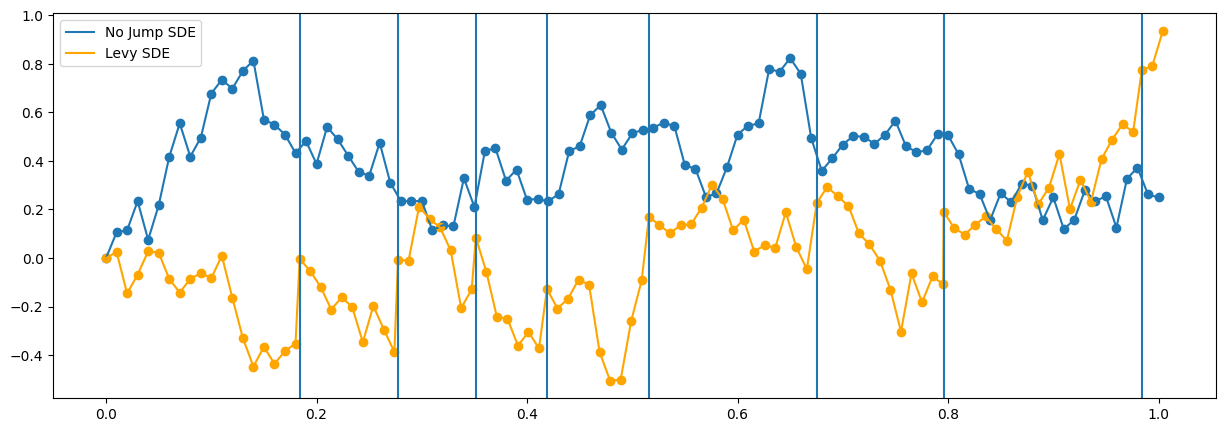

In [238]:
plt.figure(figsize=(15,5))
plt.scatter(t_values, z_values, color="C0")
plt.plot(t_values, z_values, color="C0", label="No Jump SDE")

plt.scatter(t_values_levy, z_values_levy, color="orange")
plt.plot(t_values_levy, z_values_levy, color="orange", label="Levy SDE")
for t in t_values_jumps:
    plt.axvline(x=t, ymin=-10, ymax=10)
plt.legend()